Vorgehensweise für das Area 51-Special

Den Datensatz einlesen

Wir laden den UFO-Datensatz mit Pandas.

Prüfen die Spalten und Datenstruktur, um sicherzustellen, dass die relevanten Informationen enthalten sind.

Area 51-Koordinaten bestimmen

Area 51 liegt in Nevada, USA. Wir brauchen den genauen geografischen Bereich (Longitude & Latitude).

Daten filtern

Wir filtern nur Sichtungen, die innerhalb des Koordinatenbereichs von Area 51 liegen.

Analysen durchführen

Anzahl der Sichtungen berechnen.

Tageszeit der Sichtungen analysieren.

Formen der Objekte auswerten.

Trends visualisieren (z. B. Histogramm für die Tageszeiten).

Ergebnisse visualisieren

Diagramme erstellen (z. B. Barplot, Lineplot oder Scatterplot)

In [4]:
import pandas as pd
import sys
import os

In [5]:
df_area51 = pd.read_csv(r"C:\Users\Admin\Desktop\Data Craft\Projekt_UFO\data\data_clean\ufo_sightings_scrubbed_clean.csv")

In [6]:
df_area51.head()

,datetime,city,state,country,shape,duration_seconds,duration_hour_min,comments,date_posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,"1949 Lackland AFB, TX. Lights racing across t...",2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,"Green/Orange circular disc over Chester, England",2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [7]:
df_area51.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration_hour_min', 'comments', 'date_posted', 'latitude',
       'longitude'],
      dtype='object')

In [8]:
df_area51.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           80332 non-null  object 
 1   city               80332 non-null  object 
 2   state              74535 non-null  object 
 3   country            70662 non-null  object 
 4   shape              78400 non-null  object 
 5   duration_seconds   80332 non-null  int64  
 6   duration_hour_min  80332 non-null  object 
 7   comments           80317 non-null  object 
 8   date_posted        80332 non-null  object 
 9   latitude           80332 non-null  float64
 10  longitude          80332 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 6.7+ MB


In [9]:
df_area51.isnull().sum()

datetime                0
city                    0
state                5797
country              9670
shape                1932
duration_seconds        0
duration_hour_min       0
comments               15
date_posted             0
latitude                0
longitude               0
dtype: int64

Area 51 liegt in Nevada, USA, nahe der Groom Lake Air Force Base .
Die ungefähren Koordinaten von Area 51 sind:

Wir filtern jetzt alle Sichtungen heraus, die innerhalb dieses Bereich sind
Geocoder für Area 51


In [10]:
# pip install geopy
# Importiere die Nominatim-Klasse aus der geopy.geocoders-Bibliothek.
# Nominatim ist ein Geocoding-Service, der Adressen in geografische Koordinaten umwandelt

from geopy.geocoders import Nominatim

# Erstell ein Geolokalisierungsobjekt (geolokalisierer).
# Der Parameter "user_agent" ist notwendig, da Nominatim diesen benötigt, um den Ursprung der Anfrage zu identifizieren

geolokalisierer = Nominatim(user_agent="ufo_sightings_analysis")

# Verwende die Methode "geocode", um die Adresse "Area 51, Nevada, USA" in geografische Koordinaten (Breitengrad und Längengrad) umzuwandeln
# Diese Methode sendet eine Anfrage an den Nominatim-Service
standort = geolokalisierer.geocode("Area 51, Nevada, USA")

# Überprüfe, ob der Standort gefunden 
if standort:
    # Falls ein Standort gefunden wurde, gib den Breitengrad (latitude) und Längengrad (longitude) aus
    # f-Strings werden verwendet, um die Variablen direkt in den Ausgabestring einzubetten
    print(f"Breitengrad: {standort.latitude}, Längengrad: {standort.longitude}")
else:
    # Falls kein Standort gefunden wurde, informiere den Benutzer darüber.
    print("Standort nicht gefunden.")


Breitengrad: 37.2360646, Längengrad: -115.812175


In [11]:
#  Koordinaten von Area 51
area51_lat = 37.2360646
area51_lon = -115.812175


radius = 0.30 #entspricht 30 kilometer


# Filtern der Sichtungen innerhalb des definierten Radius
#In Pandas wird der &-Operator verwendet, um mehrere Bedingungen für das Filtern eines DataFrames zu kombinieren,
#da er sicherstellt, dass beide Bedingungen gleichzeitig wahr sind, während ein Komma zu einem Fehler führen würde,
#  weil es die Bedingungen als separate Argumente interpretiert
df_area51 = df_area51[  # Verwende den richtigen DataFrame "df_area51"
    (df_area51["latitude"].astype(float) >= area51_lat - radius) & 
    (df_area51["latitude"].astype(float) <= area51_lat + radius) & 
    (df_area51["longitude"].astype(float) >= area51_lon - radius) & 
    (df_area51["longitude"].astype(float) <= area51_lon + radius)
]

# Ergebnisse anzeigen
print(f"Anzahl der Sichtungen in der Nähe von Area 51: {len(df_area51)}")
print(df_area51.head())

Anzahl der Sichtungen in der Nähe von Area 51: 4
                  datetime               city state country     shape  \
5057   2004-10-28 20:25:00  area 51 (west of)    nv     NaN  fireball   
13944  1999-11-03 02:00:00            area 51    nv     NaN    circle   
14683  1989-11-05 02:00:00         groom lake    nv     NaN       egg   
48985  1992-06-15 18:00:00            area 51    nv     NaN      oval   

       duration_seconds duration_hour_min  \
5057                 10        10 seconds   
13944              3600        app 1 hour   
14683                12            12secs   
48985             43200           12 hrs.   

                                                comments date_posted  \
5057          Two fire balls entering earths atmosphere.  2013-12-02   
13944  My brother and I witnessed a bright pulsating ...  2000-02-16   
14683  This is a little long, so please hang in there...  1999-11-30   
48985  4 adults video tape object over area 51 in Nev...  1998-03-07   

In [12]:
area51_lat = 37.2360646
area51_lon = -115.812175

radius10 = 0.10
df_area51 = df_area51[  
    (df_area51["latitude"].astype(float) >= area51_lat - radius10) & 
    (df_area51["latitude"].astype(float) <= area51_lat + radius10) & 
    (df_area51["longitude"].astype(float) >= area51_lon - radius10) & 
    (df_area51["longitude"].astype(float) <= area51_lon + radius10)
]

# Ergebnisse anzeigen
print(f"Anzahl der Sichtungen in der Nähe von Area 51: {len(df_area51)}")
print(df_area51.head())

Anzahl der Sichtungen in der Nähe von Area 51: 4
                  datetime               city state country     shape  \
5057   2004-10-28 20:25:00  area 51 (west of)    nv     NaN  fireball   
13944  1999-11-03 02:00:00            area 51    nv     NaN    circle   
14683  1989-11-05 02:00:00         groom lake    nv     NaN       egg   
48985  1992-06-15 18:00:00            area 51    nv     NaN      oval   

       duration_seconds duration_hour_min  \
5057                 10        10 seconds   
13944              3600        app 1 hour   
14683                12            12secs   
48985             43200           12 hrs.   

                                                comments date_posted  \
5057          Two fire balls entering earths atmosphere.  2013-12-02   
13944  My brother and I witnessed a bright pulsating ...  2000-02-16   
14683  This is a little long, so please hang in there...  1999-11-30   
48985  4 adults video tape object over area 51 in Nev...  1998-03-07   

In [13]:
radius20 = 0.20
df_area51 = df_area51[ 
    (df_area51["latitude"].astype(float) >= area51_lat - radius20) & 
    (df_area51["latitude"].astype(float) <= area51_lat + radius20) & 
    (df_area51["longitude"].astype(float) >= area51_lon - radius20) & 
    (df_area51["longitude"].astype(float) <= area51_lon + radius20)
]

# Ergebnisse anzeigen
print(f"Anzahl der Sichtungen in der Nähe von Area 51: {len(df_area51)}")
print(df_area51.head())

Anzahl der Sichtungen in der Nähe von Area 51: 4
                  datetime               city state country     shape  \
5057   2004-10-28 20:25:00  area 51 (west of)    nv     NaN  fireball   
13944  1999-11-03 02:00:00            area 51    nv     NaN    circle   
14683  1989-11-05 02:00:00         groom lake    nv     NaN       egg   
48985  1992-06-15 18:00:00            area 51    nv     NaN      oval   

       duration_seconds duration_hour_min  \
5057                 10        10 seconds   
13944              3600        app 1 hour   
14683                12            12secs   
48985             43200           12 hrs.   

                                                comments date_posted  \
5057          Two fire balls entering earths atmosphere.  2013-12-02   
13944  My brother and I witnessed a bright pulsating ...  2000-02-16   
14683  This is a little long, so please hang in there...  1999-11-30   
48985  4 adults video tape object over area 51 in Nev...  1998-03-07   

In [14]:
# raduis
radius30 = 30  


df_area51 = df_area51[  
    (df_area51["latitude"].astype(float) >= area51_lat - radius30) &  # Breitengrad muss größer oder gleich (Area 51 - Radius) sein
    (df_area51["latitude"].astype(float) <= area51_lat + radius30) &  # Breitengrad muss kleiner oder gleich (Area 51 + Radius) sein
    (df_area51["latitude"].astype(float) <= area51_lat + radius30) &  # Längengrad muss größer oder gleich (Area 51 - Radius) sein
    (df_area51["longitude"].astype(float) >= area51_lon - radius30)  # Längengrad muss kleiner oder gleich (Area 51 + Radius) sein
]

#  .astype(float)
# Falls latitude und longitude als Strings gespeichert, müssen sie zuerst in Zahlen (float) konvertiert werde
# Vergleiche (>=, <=) nur mit Zahlen funktionieren

# Warum & statt ,
# Das &-Zeichen bedeutet "UND" und sorgt dafür, dass ALLE Bedingungen gleichzeitig erfüllt sein müssen.
# Ein Komma , wird in Pandas nur für die Auswahl mehrerer Spalten verwendet, aber nicht für Filterbedingungen

print(f"Anzahl der Sichtungen in der Nähe von Area 51: {len(df_area51)}")

print(df_area51.head())


Anzahl der Sichtungen in der Nähe von Area 51: 4
                  datetime               city state country     shape  \
5057   2004-10-28 20:25:00  area 51 (west of)    nv     NaN  fireball   
13944  1999-11-03 02:00:00            area 51    nv     NaN    circle   
14683  1989-11-05 02:00:00         groom lake    nv     NaN       egg   
48985  1992-06-15 18:00:00            area 51    nv     NaN      oval   

       duration_seconds duration_hour_min  \
5057                 10        10 seconds   
13944              3600        app 1 hour   
14683                12            12secs   
48985             43200           12 hrs.   

                                                comments date_posted  \
5057          Two fire balls entering earths atmosphere.  2013-12-02   
13944  My brother and I witnessed a bright pulsating ...  2000-02-16   
14683  This is a little long, so please hang in there...  1999-11-30   
48985  4 adults video tape object over area 51 in Nev...  1998-03-07   

Sichtungen nach Tageszeit analysieren

In [15]:
df_area51["duration_hour"] = df_area51["duration_seconds"] / 3600

print(df_area51[["duration_seconds", "duration_hour"]].head())

       duration_seconds  duration_hour
5057                 10       0.002778
13944              3600       1.000000
14683                12       0.003333
48985             43200      12.000000


In [16]:
df_area51

,datetime,city,state,country,shape,duration_seconds,duration_hour_min,comments,date_posted,latitude,longitude,duration_hour
5057,2004-10-28 20:25:00,area 51 (west of),nv,NaN,fireball,10,10 seconds,Two fire balls entering earths atmosphere.,2013-12-02,37.252526,-115.800413,0.002778
13944,1999-11-03 02:00:00,area 51,nv,NaN,circle,3600,app 1 hour,My brother and I witnessed a bright pulsating ...,2000-02-16,37.252526,-115.800413,1.000000
14683,1989-11-05 02:00:00,groom lake,nv,NaN,egg,12,12secs,"This is a little long, so please hang in there...",1999-11-30,37.276675,-115.798936,0.003333
48985,1992-06-15 18:00:00,area 51,nv,NaN,oval,43200,12 hrs.,4 adults video tape object over area 51 in Nev...,1998-03-07,37.252526,-115.800413,12.000000


In [17]:
# Stelle sicher, dass datetime ein DateTime-Objekt ist
df_area51["datetime"] = pd.to_datetime(df_area51["datetime"], errors="ignore")

# Extrahiere die Stunde der Sichtung
df_area51["hour"] = df_area51["datetime"].dt.hour

# Weise die Tageszeit basierend auf der Sichtungsstunde zu
df_area51["time_of_day"] = df_area51["hour"].apply(lambda x: "Tag" if 6 <= x < 18 else "Nacht")

# Überprüfe das Ergebnis
print(df_area51[["datetime", "duration_seconds" ,"time_of_day"]].head())


                 datetime  duration_seconds time_of_day
5057  2004-10-28 20:25:00                10       Nacht
13944 1999-11-03 02:00:00              3600       Nacht
14683 1989-11-05 02:00:00                12       Nacht
48985 1992-06-15 18:00:00             43200       Nacht


C:\Users\Admin\AppData\Local\Temp\ipykernel_14136\3129969971.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_area51["datetime"] = pd.to_datetime(df_area51["datetime"], errors="ignore")


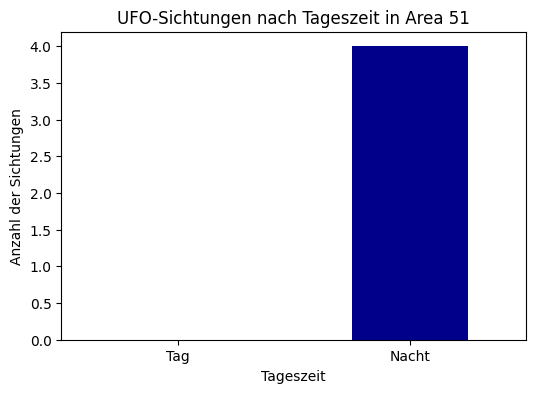

In [18]:
import matplotlib.pyplot as plt  

# Zähle die Sichtungen für "Tag" und "Nacht"
time_counts = df_area51["time_of_day"].value_counts()

plt.figure(figsize=(6, 4))

# Manuelle Reihenfolge: Erst "Tag", dann "Nacht"
time_counts = time_counts.reindex(["Tag", "Nacht"])

# Balkendiagramm 
time_counts.plot(kind="bar", color=["orange", "darkblue"])

# Achsenbeschriftungen und Titel 
plt.xlabel("Tageszeit")
plt.ylabel("Anzahl der Sichtungen")
plt.title("UFO-Sichtungen nach Tageszeit in Area 51")

# X-Achsen-Beschriftung waagerecht ausrichten
plt.xticks(rotation=0)

plt.savefig("UFO Tageszeit.png")
plt.show()


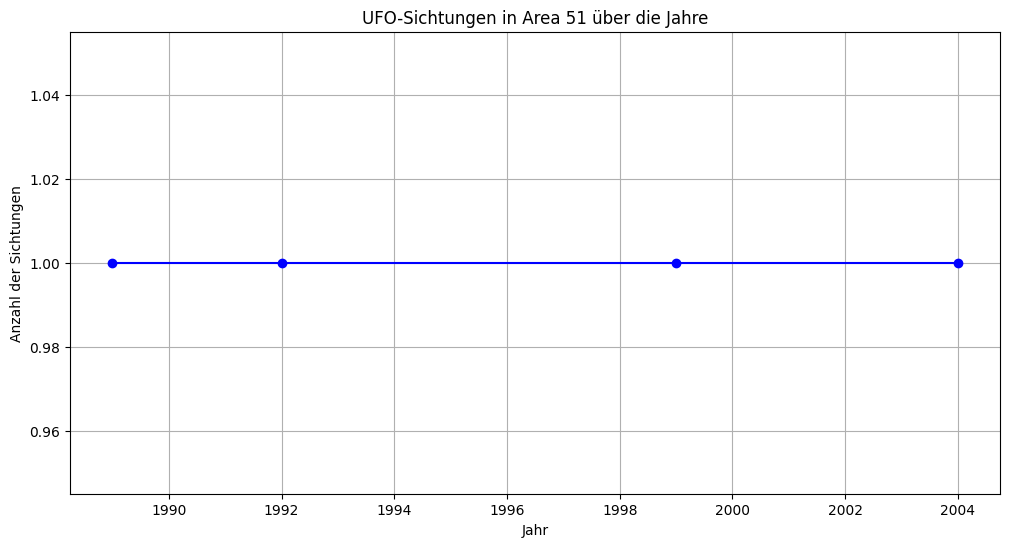

In [19]:
#Wir holen uns aus datetime nur das Jahr
df_area51["year"] = df_area51["datetime"].dt.year

#WIr zählen, wie oft jedes Jahr eine Sichtung registriert wurde

df_trend = df_area51.groupby("year").size().reset_index(name="count")

#diagramm
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_trend["year"], df_trend["count"], marker="o", linestyle="-", color="blue")

plt.xlabel("Jahr")
plt.ylabel("Anzahl der Sichtungen")
plt.title("UFO-Sichtungen in Area 51 über die Jahre")
plt.grid(True)

plt.savefig("UFO_Sichtungen in Area 51 über die Jahre.png")
plt.show()




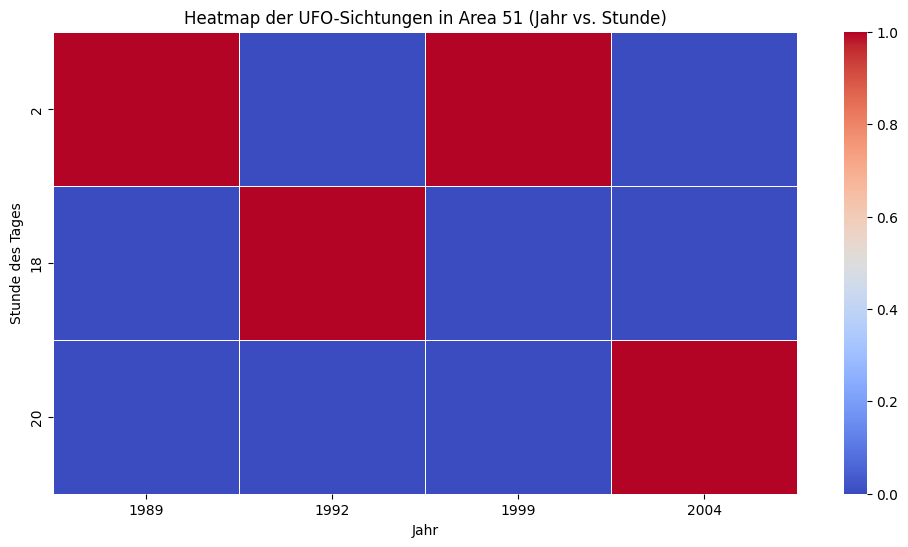

In [20]:
# Notwendige Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Schauen ob  datetime ein Datetime-Objekt gespeichert ist
df_area51["datetime"] = pd.to_datetime(df_area51["datetime"], errors="coerce")

# hole das Jahr und die Stunde aus der datetime-Spalte
df_area51["year"] = df_area51["datetime"].dt.year  # Holt das Jahr der Sichtung
df_area51["hour"] = df_area51["datetime"].dt.hour  # Holt die Stunde der Sichtung (0-23)

# Pivot-Tabelle esretllen um die Sichtungshäufigkeit nach Jahr und Stunde darzustellen
heatmap_data = df_area51.pivot_table(
    index="hour",  # Stunden als Zeilen (0 bis 23)
    columns="year",  # Jahre als Spalten
    aggfunc="size",  # Zählt die Anzahl der Sichtungen
    fill_value=0  # Falls keine Sichtungen existieren, trage eine 0 ein
)

# Heatmap
plt.figure(figsize=(12, 6))  # Größe des Diagramms festlegen
sns.heatmap(
    heatmap_data,  # Die erstellte Pivot-Tabelle als Datenquelle
    cmap="coolwarm",  # Farbskala: Blau für wenig, Rot für viele Sichtungen
    annot=False,  # Keine Werte direkt in die Zellen schreiben (kann auf True gesetzt werden)
    linewidths=0.5  # Feine Linien zwischen den Zellen für bessere Lesbarkeit
)

#Diagrammbeschriftung hinzufügen
plt.xlabel("Jahr")  # X-Achsen-Beschriftung
plt.ylabel("Stunde des Tages")  # Y-Achsen-Beschriftung
plt.title("Heatmap der UFO-Sichtungen in Area 51 (Jahr vs. Stunde)")  # Titel der Heatmap

plt.savefig("heatmap.png")
plt.show()
